<a href="https://colab.research.google.com/github/gowravmannem/MATH4194/blob/main/Math4194_Project1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error

from sklearn.datasets import load_breast_cancer
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

## Task 1: Simple Linear Regression on Simulated Data

In [ ]:
def linear_regression_experiment(noise_level):
    np.random.seed(2)
    X = np.linspace(0, 10, 100).reshape(-1, 1)
    epsilon = np.random.normal(0, noise_level, 100).reshape(-1, 1)
    y = 3 * X + epsilon

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

    model = LinearRegression()
    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)

    plt.figure(figsize=(8, 6))
    sns.scatterplot(x=X_train.flatten(), y=y_train.flatten(), label='Train Data', color='blue', alpha=0.6)
    sns.scatterplot(x=X_test.flatten(), y=y_test.flatten(), label='Test Data', color='red', alpha=0.6)
    plt.plot(X, model.predict(X), color='black', label='Regression Line')
    plt.xlabel('X')
    plt.ylabel('y')
    plt.title(f'Linear Regression with Noise Level {noise_level} (MSE: {mse:.4f})')
    plt.legend()
    plt.show()

    print(f'Noise Level: {noise_level}, MSE: {mse:.4f}')

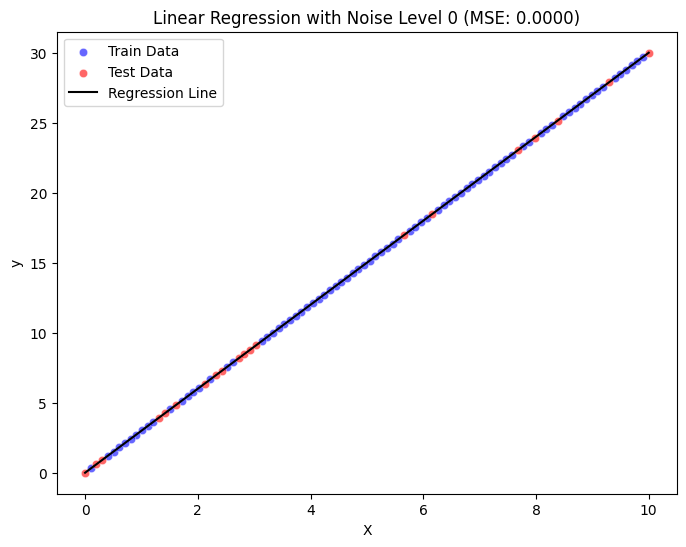

Noise Level: 0, MSE: 0.0000


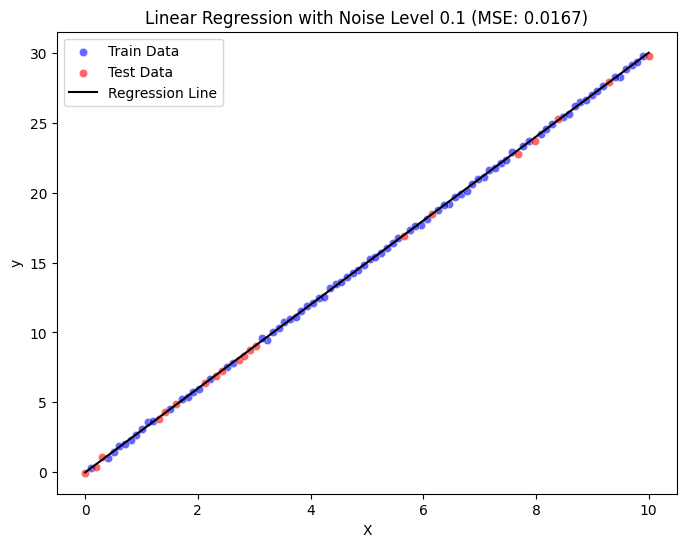

Noise Level: 0.1, MSE: 0.0167


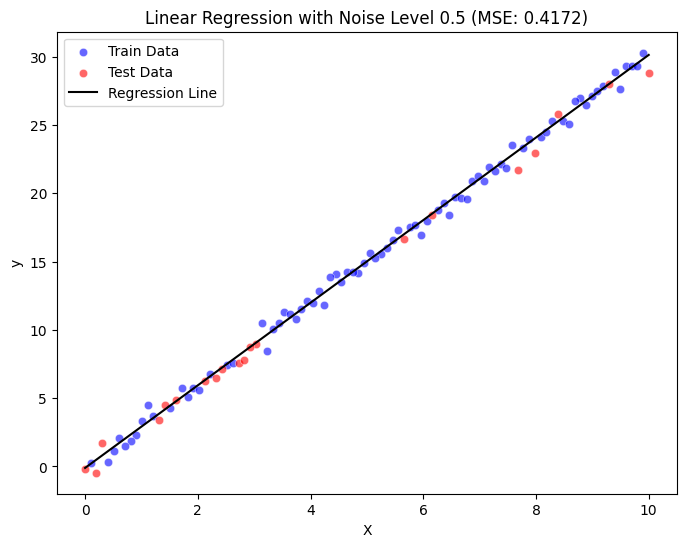

Noise Level: 0.5, MSE: 0.4172


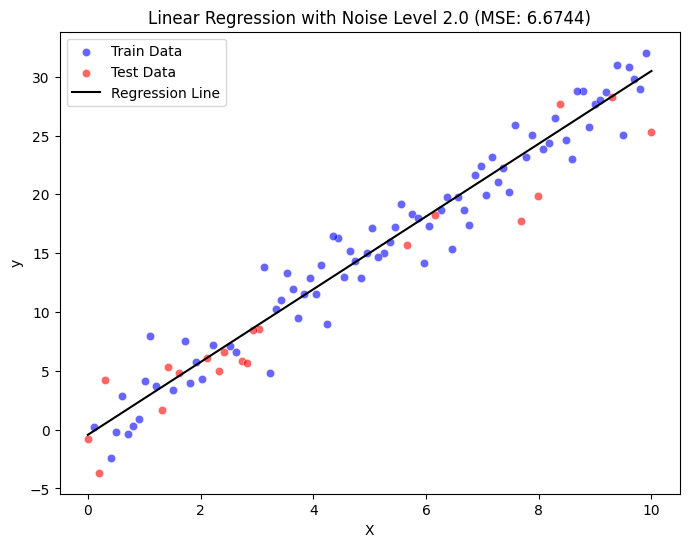

Noise Level: 2.0, MSE: 6.6744


In [ ]:
for noise in [0, 0.1, 0.5, 2.0]:
    linear_regression_experiment(noise)

We can see that as the noise increases, the points deviate more from the regression line, leading to the MSE to rise.

#Task 2: Polynomial Regression and Regularization

In [ ]:
np.random.seed(40)
x = np.linspace(0, 10, 100).reshape(-1, 1)
eps = np.random.normal(0, 1, 100).reshape(-1, 1)

y = 2 * (x**2) + 3 * x + eps
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=40)

In [ ]:
linear_model = LinearRegression()
linear_model.fit(x_train, y_train)
y_pred_linear = linear_model.predict(x_test)


poly = PolynomialFeatures(degree=2)
x_train_poly = poly.fit_transform(x_train)
x_test_poly = poly.transform(x_test)
poly_model = LinearRegression()
poly_model.fit(x_train_poly, y_train)
y_pred_poly = poly_model.predict(x_test_poly)

In [ ]:
alphas = np.logspace(-3, 3, 100)
best_ridge_alpha = min(alphas, key=lambda a: -np.mean(cross_val_score(Ridge(alpha=a), x_train_poly, y_train, cv=25, scoring="neg_mean_squared_error")))
best_lasso_alpha = min(alphas, key=lambda a: -np.mean(cross_val_score(Lasso(alpha=a), x_train_poly, y_train, cv=25, scoring="neg_mean_squared_error")))
print(f"Best Ridge Alpha: {best_ridge_alpha}")
print(f"Best Lasso Alpha: {best_lasso_alpha}")

ridge_model = Ridge(alpha=best_ridge_alpha)
lasso_model = Lasso(alpha=best_lasso_alpha)

ridge_model.fit(x_train_poly, y_train)
lasso_model.fit(x_train_poly, y_train)

y_pred_ridge = ridge_model.predict(x_test_poly)
y_pred_lasso = lasso_model.predict(x_test_poly)

Best Ridge Alpha: 0.02848035868435802
Best Lasso Alpha: 0.001


In [ ]:
mse_linear = mean_squared_error(y_test, y_pred_linear)
mse_poly = mean_squared_error(y_test, y_pred_poly)
mse_ridge = mean_squared_error(y_test, y_pred_ridge)
mse_lasso = mean_squared_error(y_test, y_pred_lasso)

print(f"Linear Regression MSE: {mse_linear:.4f}")
print(f"Polynomial Regression MSE: {mse_poly:.4f}")
print(f"Ridge Regression MSE (α={best_ridge_alpha:.6f}): {mse_ridge:.4f}")
print(f"Lasso Regression MSE (α={best_lasso_alpha:.6f}): {mse_lasso:.4f}")

Linear Regression MSE: 166.9013
Polynomial Regression MSE: 0.5615
Ridge Regression MSE (α=0.028480): 0.5622
Lasso Regression MSE (α=0.001000): 0.5604


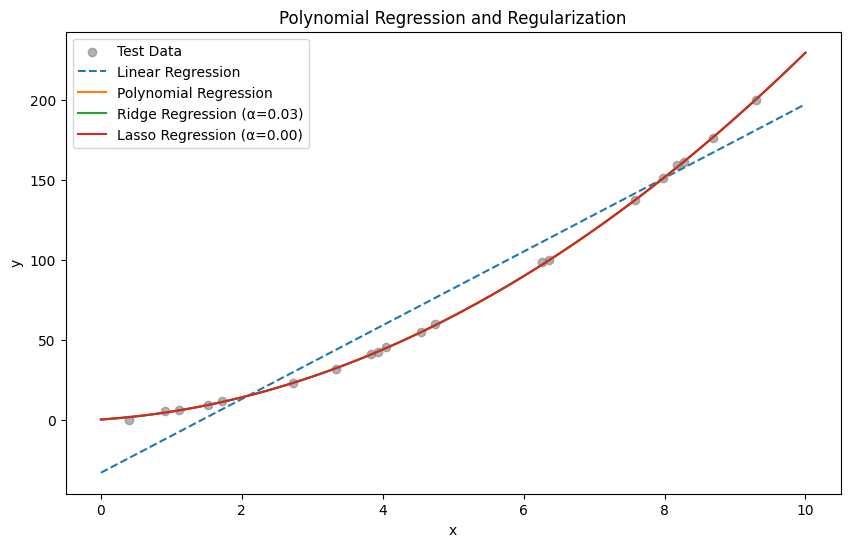

In [ ]:
plt.figure(figsize=(10, 6))

plt.scatter(x_test, y_test, color='gray', alpha=0.6, label="Test Data")

x_range = np.linspace(0, 10, 100).reshape(-1, 1)
plt.plot(x_range, linear_model.predict(x_range), label="Linear Regression", linestyle="dashed")
plt.plot(x_range, poly_model.predict(poly.transform(x_range)), label="Polynomial Regression")
plt.plot(x_range, ridge_model.predict(poly.transform(x_range)), label=f"Ridge Regression (α={best_ridge_alpha:.2f})")
plt.plot(x_range, lasso_model.predict(poly.transform(x_range)), label=f"Lasso Regression (α={best_lasso_alpha:.2f})")

plt.xlabel("x")
plt.ylabel("y")
plt.title("Polynomial Regression and Regularization")
plt.legend()
plt.show()

In the above graph the polynomial, ridge, and lasso regression all overlap each other. The best model is the Lasso Regression since it has the lowest MSE.

Ridge regression reduces the magnitude of coefficients but does not set them to zero. Lasso regression shrinks some coefficients to zero, performing feature selection. In general, Regularization prevents overfitting, making the model generalize better to the test data split.

When a large alpha value is picked, Ridge regression will shrink coefficients too much, leading to underfitting. Meanwhile, Lasso regression will drive most coefficients to zero, making the model behave like a linear regression model.

#Task 3: Classification using real data

In [ ]:
data = load_breast_cancer()
X, y = data.data, data.target
print(X)

[[1.799e+01 1.038e+01 1.228e+02 ... 2.654e-01 4.601e-01 1.189e-01]
 [2.057e+01 1.777e+01 1.329e+02 ... 1.860e-01 2.750e-01 8.902e-02]
 [1.969e+01 2.125e+01 1.300e+02 ... 2.430e-01 3.613e-01 8.758e-02]
 ...
 [1.660e+01 2.808e+01 1.083e+02 ... 1.418e-01 2.218e-01 7.820e-02]
 [2.060e+01 2.933e+01 1.401e+02 ... 2.650e-01 4.087e-01 1.240e-01]
 [7.760e+00 2.454e+01 4.792e+01 ... 0.000e+00 2.871e-01 7.039e-02]]


In [ ]:
np.random.seed(2)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

kernels = ['linear', 'poly', 'rbf']
models = {kernel: SVC(kernel=kernel, probability=True) for kernel in kernels}

for kernel, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(f"Kernel: {kernel}")
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("Classification Report:\n", classification_report(y_test, y_pred))
    print("-" * 50)

Kernel: linear
Accuracy: 0.956140350877193
Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.98      0.95        45
           1       0.98      0.94      0.96        69

    accuracy                           0.96       114
   macro avg       0.95      0.96      0.95       114
weighted avg       0.96      0.96      0.96       114

--------------------------------------------------
Kernel: poly
Accuracy: 0.8947368421052632
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.73      0.85        45
           1       0.85      1.00      0.92        69

    accuracy                           0.89       114
   macro avg       0.93      0.87      0.88       114
weighted avg       0.91      0.89      0.89       114

--------------------------------------------------
Kernel: rbf
Accuracy: 0.9649122807017544
Classification Report:
               precision    recall  f1-score   

The Breast Cancer dataset from sklearn.datasets contains 569 samples with 30 numerical features, used to classify tumors as malignant (0) or benign (1). The dataset is well-structured and does not contain missing values.

Since SVM is sensitive to feature magnitudes, we standardized all features using StandardScaler. We do not need to encode categorical variables as it has already been encoded: 0 for Malignant and 1 for benign. We split the dataset into 80% training and 20% testing using train_test_split.

The rbf kernel has the highest accuracy on the dataset of 96.5% compared to poly and linear. This suggests that the decision boundary is nonlinear, making rbf a better choice for capturing complex relationships in the data.

